# FIT5197 2023 S1 Final Assessment

**SPECIAL NOTE:** Please refer to the [assessment page](https://lms.monash.edu/mod/assign/view.php?id=11961926) for rules, general guidelines and marking rubrics of the assessment (the marking rubric for the kaggle competition part will be released near the deadline in the same page). Failure to comply with the provided information will result in a deduction of mark (i.e. late penalties) or breach of academic integrity.

**YOUR NAME**:kai xu

**STUDENT ID**: 32891059

**KAGGLE NAME/ID** (See part 1, Question 5 or part 2): Kai Xu

Please also enter your details in this [google form](https://forms.gle/XZEck2BPKG2PftdC9).

# Part 1 Regression (50 Marks)

Around 1000 people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual. You need to build regression models to optimally predict the variable in the survey dataset called 'happiness' based on any, or all, of the other survey question responses.

You have been provided with two datasets, ```regression_train.csv``` and ```regression_test.csv```. Using these datasets, you hope to build a model that can predict happiness level using the other variables. ```regression_train.csv``` comes with the ground-truth target label (i.e. happiness level) whereas `regression_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict happiness. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. E.g. the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

**PLEASE NOTE THAT THE USE OF LIBRARIES ARE PROHIBITED IN THESE QUESTIONS UNLESS STATED OTHERWISE, ANSWERS USING LIBRARIES WILL RECEIVE 0 MARKS**

## Question 1 (NO LIBRARIES ALLOWED) (4 Mark)
Please load the ```regression_train.csv``` and fit a [$\textbf{multiple linear regression model}$](https://en.wikipedia.org/wiki/Linear_regression) with 'happiness' being the target variable. According to the summary table, which predictors do you think are possibly associated with the target variable (use the significance level of 0.01), and which are the **Top 5** strongest predictors? Please write an R script to automatically fetch and print this information.

**NOTE**: Manually doing the above tasks will result in 0 marks.

In [ ]:
# Loading CSV file
regression_train <- read.csv("regression_train.csv")
regression_test <- read.csv("regression_test.csv")

# Construct multiple linear regression model
mlr.model <- lm(happiness ~ ., regression_train)

# Get information about the model
model_summary <- summary(mlr.model)
p_values <- model_summary$coefficients[-1, 4]  # Extract the P-value of the coefficient
p_values <- data.frame(p_values[order(p_values)])  # Sort by p-value
colnames(p_values) <- 'p_value'
p_values <- subset(p_values, p_value < 0.01)  # Select results with a p value less than 0.01
significant_coef <- rownames(p_values)  # Extract the coefficient name of the associated feature

# Get important coefficient names (top 5)
important_coef <- rownames(p_values[1:5, , drop = FALSE])

# Print the coefficient name of the associated feature
print(paste('The associated features are:', significant_coef))


 [1] "The associated features are: alwaysAccountableAndResponsibleForYourActions"                           
 [2] "The associated features are: iUsuallyHaveAGoodInfluenceOnEvents"                                      
 [3] "The associated features are: doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferSometimes"
 [4] "The associated features are: betterDecisionsAreMadeWhenLeadersDiscussMattersWithOthersFirst"          
 [5] "The associated features are: iAmAlwaysCommittedAndInvolved"                                           
 [6] "The associated features are: iDontFeelParticularlyPleasedWithTheWayIAm"                               
 [7] "The associated features are: iAmOpenToEngagingInPracticesWhichFocusOnMyInterestsAndBeliefs"           
 [8] "The associated features are: iFeelThatImAPersonOfWorth"                                               
 [9] "The associated features are: friendsOughtToBeConcernedAboutEachOthersWishes"                          
[10] "The associate

In [ ]:
print(paste('The top 5 features are :',important_coef))

[1] "The top 5 features are : alwaysAccountableAndResponsibleForYourActions"                           
[2] "The top 5 features are : iUsuallyHaveAGoodInfluenceOnEvents"                                      
[3] "The top 5 features are : doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferSometimes"
[4] "The top 5 features are : betterDecisionsAreMadeWhenLeadersDiscussMattersWithOthersFirst"          
[5] "The top 5 features are : iAmAlwaysCommittedAndInvolved"                                           


## Question 2 (2 Mark)
[**R squared**](https://en.wikipedia.org/wiki/Coefficient_of_determination) from the summary table reflects that the full model doesn't fit the training dataset well; thus, you try to quantify the error between the values of the ground-truth and those of the model prediction. You want to write a function to predict 'happiness' with the given dataset and calculate the [root mean squared error (rMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) between the model predictions and the ground truths. Please test this function on the full model and the training dataset.

In [ ]:
# Define function: Calculate root mean square error (RMSE)
rmse <- function(dataset, model) {
  # Forecast result
  predicted <- predict(model, dataset)

  # Calculate the sum of squares of error
  error <- sum((predicted - dataset[,'happiness'])^2)

  # Calculate root-mean-square error and return
  rmse_value <- sqrt(error / nrow(dataset))
  return(rmse_value)
}

# Calculate root-mean-square error
error <- rmse(regression_train, mlr.model)

# Print error
print(error)


[1] 7.492705


## Question 3 (2 Marks)
You find the full model complicated and try to reduce the complexity by performing [bidirectional stepwise regression](https://en.wikipedia.org/wiki/Stepwise_regression) with [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

Calculate the **rMSE** of this new model with the function that you implemented previously. Is there anything you find unusual? Explain your findings in 100 words.

In [ ]:
# Perform stepwise variable selection using the step() function
stepwise_model <- step(mlr.model, trace = 1, k = log(nrow(regression_train)), direction = 'both')

Start:  AIC=3938.65
happiness ~ gender + alwaysDepressed + alwaysAnxious + alwaysStressed + 
    alwaysLoveAndCareForYourself + alwaysAccountableAndResponsibleForYourActions + 
    alwaysCalm + extreAustraliayGoodAbilityToSense + alwaysHaveDigestiveProblems + 
    myBodyIsHypermobileAndLovesToMove + alwaysHaveFun + alwaysSerious + 
    extreAustraliayGoodCommunicator + iDontFeelParticularlyPleasedWithTheWayIAm + 
    iAmIntenselyInterestedInOtherPeople + iFeelThatLifeIsVeryRewarding + 
    iHaveVeryWarmFeelingsTowardsAlmostEveryone + iRarelyWakeUpFeelingRested + 
    iAmNotParticularlyOptimisticAboutTheFuture + iFindMostThingsAmusing + 
    iAmAlwaysCommittedAndInvolved + iDoNotThinkThatTheWorldIsAGoodPlace + 
    iAmWellSatisfiedAboutEverythingInMyLife + iDontThinkILookAttractive + 
    thereIsAGapBetweenWhatIWouldLikeToDoAndWhatIHaveDone + iAlwaysHaveACheerfulEffectOnOthers + 
    iCanFitInFindTimeForEverythingIWantTo + iFeelThatIAmNotEspeciallyInControlOfMyLife + 
    iFeelAbleToTak

In [ ]:
summary(stepwise_model)


Call:
lm(formula = happiness ~ alwaysAccountableAndResponsibleForYourActions + 
    alwaysCalm + alwaysHaveDigestiveProblems + alwaysHaveFun + 
    iDontFeelParticularlyPleasedWithTheWayIAm + iRarelyWakeUpFeelingRested + 
    iFindMostThingsAmusing + iAmAlwaysCommittedAndInvolved + 
    thereIsAGapBetweenWhatIWouldLikeToDoAndWhatIHaveDone + iCanFitInFindTimeForEverythingIWantTo + 
    iFeelFullyMentallyAlert + iUsuallyHaveAGoodInfluenceOnEvents + 
    iDontHaveParticularlyHappyMemoriesOfThePast + onTheWholeIAmSatisfiedWithMyself + 
    iFeelThatIHaveANumberOfGoodQualities + iFeelThatImAPersonOfWorth + 
    betterDecisionsAreMadeWhenLeadersDiscussMattersWithOthersFirst + 
    involvementInJointProjectsIsVerySatisfying + committeesAreAWasteOfTime + 
    iLikeToGetToKnowPeopleBetter + friendsOughtToBeConcernedAboutEachOthersWishes + 
    doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer + 
    iAmOpenToEngagingInPracticesWhichFocusOnMyInterestsAndBeliefs + 
    iWillinglySe

In [ ]:
print(rmse(regression_train,stepwise_model))

[1] 8.142875


My answer:
Comparing the rMSE values of the original complete model (7.492705) and the new model (8.142875) obtained by bidirectional step-up regression, we observe an increase in rMSE. This increase in happiness suggests that the new model may be less accurate at predicting target variables than the initial full model

## Question 4 (2 Mark)
Although stepwise regression has reduced the model complexity significantly, the model still contains a lot of variables that we want to remove. Therefore, you are interested in lightweight linear regression models with ONLY TWO predictors. Write a script to automatically find the best lightweight model which corresponds to the model with the least **rMSE** on the training dataset. Compare the **rMSE** of the best lightweight model with the **rMSE** of the full model - ```lm.fit``` - that you built previously. Give an explanation for these results based on consideration of the predictors involved.

In [ ]:
rmse <- function(dataset, model) {
  predicted <- predict(model, dataset)
  return(sqrt(mean((predicted - dataset$'happiness')^2)))
}

select.two <- function(dataset){
  minimum_error = Inf
  predictors = c()

  # Exclude the 'happiness' column from the predictors list
  predictors_list <- colnames(dataset)[colnames(dataset) != "happiness"]

  for(i in 1:(length(predictors_list) - 1)) {
    for(j in (i + 1):length(predictors_list)) {

      # Construct the model formula
      model_formula <- as.formula(paste("happiness ~", predictors_list[i], "+", predictors_list[j]))

      # Build the model
      model <- lm(model_formula, data = dataset)

      # Calculate RMSE
      rmse_value <- rmse(dataset,model)

      # If the current RMSE is less than the minimum_error, update minimum_error and predictors
      if(rmse_value < minimum_error){
        minimum_error <- rmse_value
        predictors <- c(predictors_list[i],predictors_list[j])
      }
    }
  }

  # Return the best predictors and the minimum RMSE
  return(list("predictors" = predictors, "minimum_error" = minimum_error))
}

# Test the function
best_lightweight_model_results <- select.two(regression_train)
print(best_lightweight_model_results)


$predictors
[1] "alwaysAccountableAndResponsibleForYourActions"
[2] "onTheWholeIAmSatisfiedWithMyself"             

$minimum_error
[1] 9.906075



### ANSWER (TEXT)

Comparing this to the rMSE of the previously built full model (lm.fit) (7.492705), we can observe that the best lightweight model has a higher rMSE. This shows that a complete model with multiple predictors has better predictive performance and lower errors than a lightweight model with only two predictors.

## Question 5 (Libraries are allowed) (40 Marks)
As a Data Scientist, one of the key tasks is to build models $\textbf{most appropriate/closest}$ to the truth; thus, modelling will not be limited to the aforementioned steps in this assignment. To simulate for a realistic modelling process, this question will be in the form of a [Kaggle competition](https://www.kaggle.com/t/39b1b7b305ca4feaa234135059b701ac) among students to find out who has the best model.

Thus, you **will be graded** by the **rMSE** performance of your model, the better your model, the higher your score. Additionally, you need to describe/document your thought process in this model building process, this is akin to showing your working properly for the mathematic sections. If you don't clearly document the reasonings behind the model you use, we will have to make some deductions on your scores.

This is the [video tutorial](https://www.youtube.com/watch?v=rkXc25Uvyl4) on how to join any Kaggle competition.

When you optimize your model's performance, you can use any supervised model that you know and feature selection might be a big help as well. [Check the non-exhaustive set of R functions relevant to this unit](https://lms.monash.edu/mod/resource/view.php?id=11405864) for ideas for different models to try.

$\textbf{Note}$ Please make sure that we can install the libraries that you use in this part, the code structure can be:

```install.packages("some package", repos='http://cran.us.r-project.org')```

```library("some package")```

Remember that if we cannot run your code, we will have to give you a deduction. Our suggestion is for you to use the standard ```R version 3.6.1```

You also need to name your final model ``fin.mod`` so we can run a check to find out your performance. A good test for your understanding would be to set the previous $\textbf{BIC model}$ to be the final model to check if your code works perfectly.

In [ ]:
train <- read.csv("regression_train.csv")

In [ ]:
# Install
install.packages("visdat")

# Load
library(visdat)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Initially observe the data type and whether it contains null values

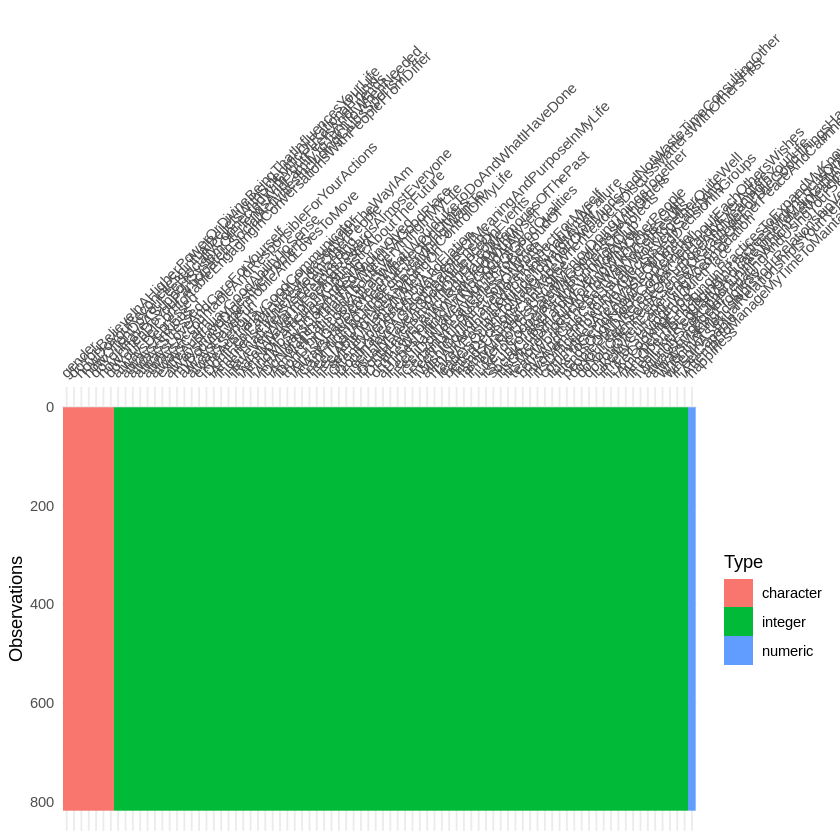

In [ ]:
vis_dat(train)

Observe the data for discrete values

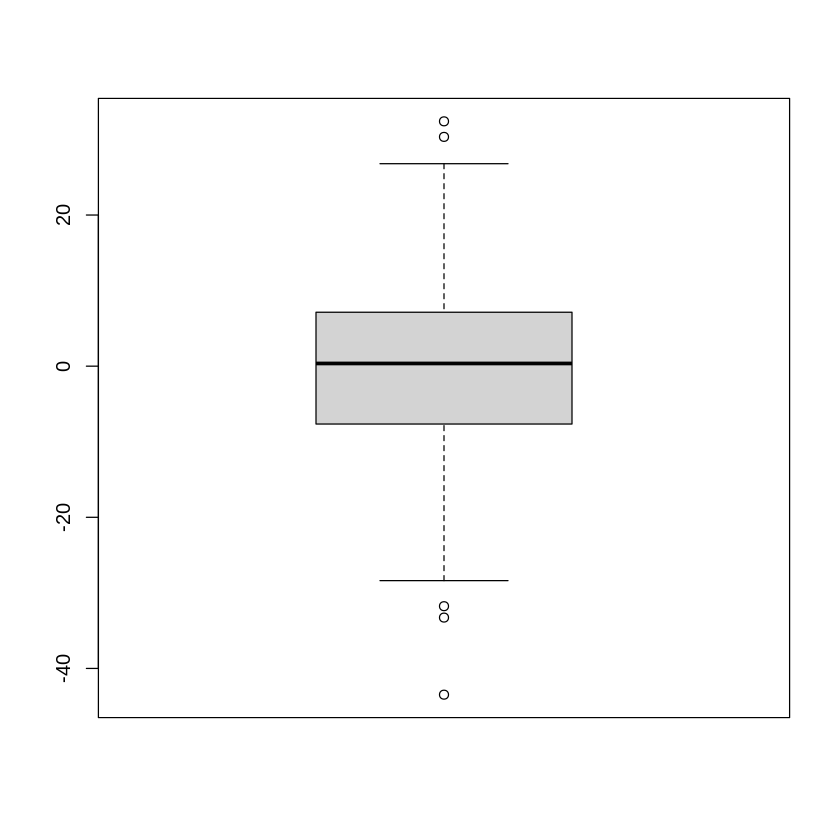

In [ ]:
boxplot(train$happiness)

Discrete values are obtained and processed

Process discrete values and plot histograms to observe data trends

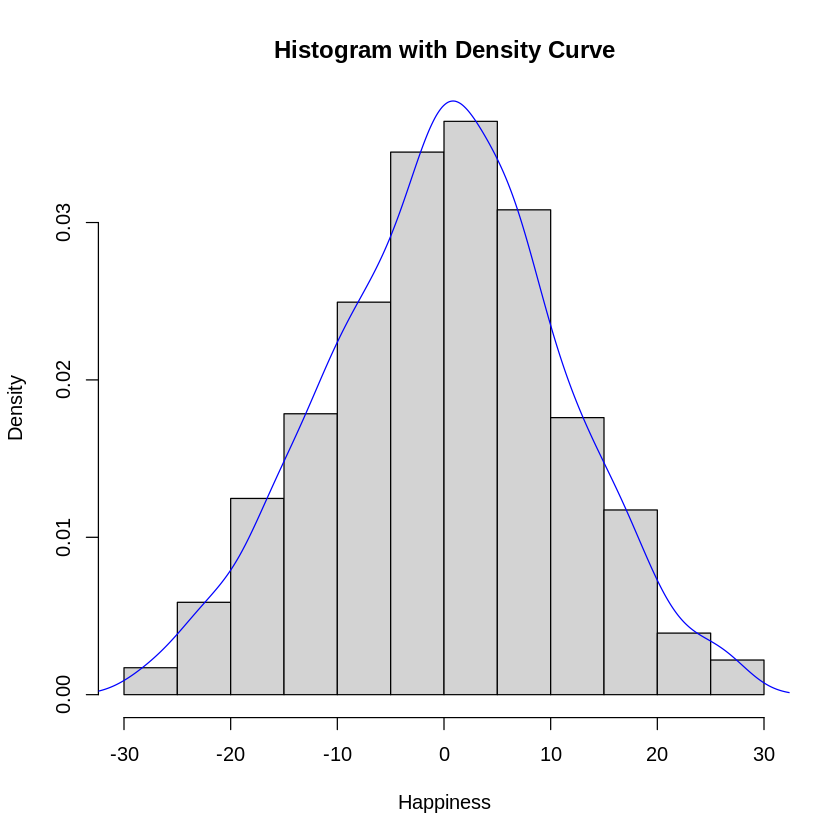

In [ ]:
# Load necessary libraries
library(ggplot2)

# Identify the outliers
outliers <- boxplot(train$happiness, plot = FALSE)$out

# Exclude the outliers
happiness_no_outliers <- train$happiness[!train$happiness %in% outliers]

# Calculate the upper quantile of the 'happiness' variable without outliers
upper_quantile <- quantile(happiness_no_outliers, probs = 1)

# Replace the outliers in the original dataset with the upper quantile
train$happiness[train$happiness %in% outliers] <- upper_quantile

# Create the histogram and save the result
hist_info <- hist(train$happiness, freq = FALSE, main = "Histogram with Density Curve", xlab = "Happiness")

# Generate data for the density curve
density_info <- density(train$happiness)

# Add the density curve
lines(density_info, col = "blue")


Check whether the data is processed cleanly

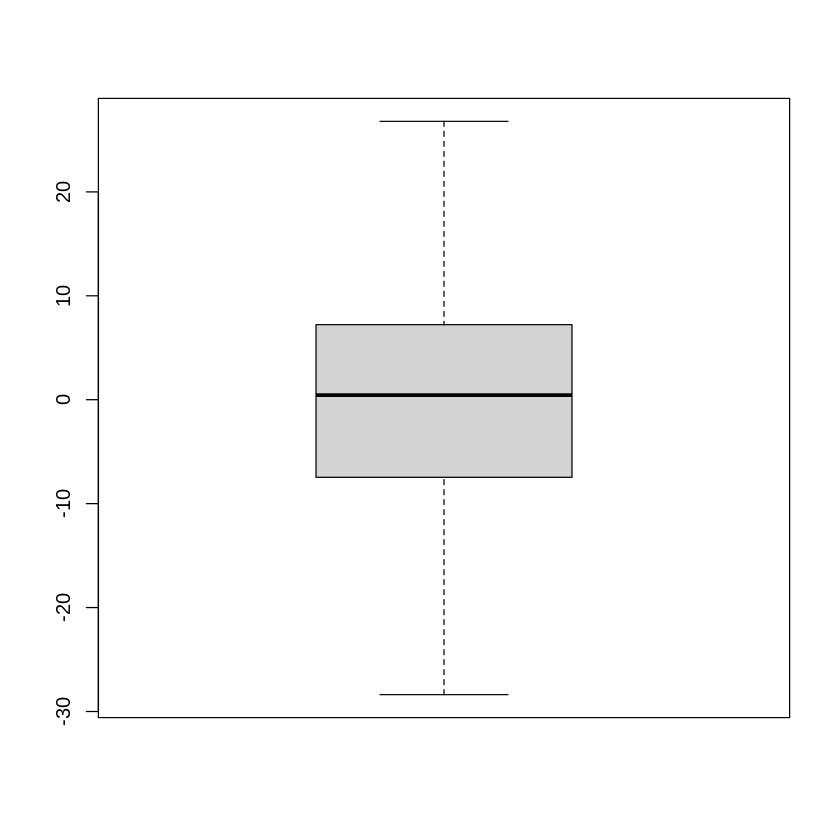

In [ ]:
boxplot(train$happiness)

Install the required libraries

In [ ]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Handling eigenvalues In my trials, I found that removing the last eigenvalue improved the kaggle score

In [ ]:
library(randomForest)
rf_model <- randomForest(happiness~.,train)
importance<-importance(rf_model)
importance <-as.data.frame(importance)
row_names <- rownames(importance)
importance$NewColumn <- rownames(importance)
importance <- importance[order(importance$IncNodePurity, decreasing = TRUE), ]
list_features <-importance$NewColumn[1:84]


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




The model processes and outputs the results

In [ ]:
library(data.table)

# Set seed for reproducibility
set.seed(123)

# Convert data frame to data table
setDT(train)

# Prepare data for linear regression
labels <- train$happiness
# Select the desired features from the train data
selected_features <- train[, ..list_features]

# Train linear regression model
fin.mod <- lm(labels ~ ., data = selected_features)

# Load in the test data.
test <- read.csv("regression_test.csv")

# Convert test data frame to data table
setDT(test)

# Select the same set of features for the test data
selected_test <- test[, ..list_features]

# Make predictions on the test data
pred.label <- predict(fin.mod, newdata = selected_test)

# Put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
write.csv(
  data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),
  "RegressionPredictLabel.csv",
  row.names = F
)


In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

tryCatch(
    {
        source("../supplimentary.R")
    },
    error = function(e){
        source("supplimentary.R")
    }
)

truths <- tryCatch(
    {
        read.csv("../regression_test_label.csv")
    },
    error = function(e){
        read.csv("regression_test_label.csv")
    }
)


RMSE.fin <- rmse(pred.label, truths$x)
cat(paste("RMSE is", RMSE.fin))

# Part 2 Classification (50 Marks)

Around 1000 people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual, but this time we want to predict a categorical score for happiness, rather than a continuous score. You need to build 5-class classification models to optimally predict the variable in the survey dataset called 'iAmVeryHappy' based on any, or all, of the other survey question responses.

You have been provided with two datasets, ```classification_train.csv``` and ```classification_test.csv```. Using these datasets, you hope to build a model that can predict 'iAmVeryHappy' using the other variables. ```classification_train.csv``` comes with the ground-truth target label (i.e. 'iAmVeryHappy' happiness classes) whereas `classification_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict 'iAmVeryHappy'. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. E.g. the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

This question will also be in the form of a [Kaggle competition](https://www.kaggle.com/t/ab17f8b7e1d941b6bc70ce0265ca8798) among students to find out who has the best model.

Import data

In [ ]:
train <- read.csv("classification_train.csv")
test<-read.csv("classification_test.csv")

Initially observe the data type and whether it contains null values

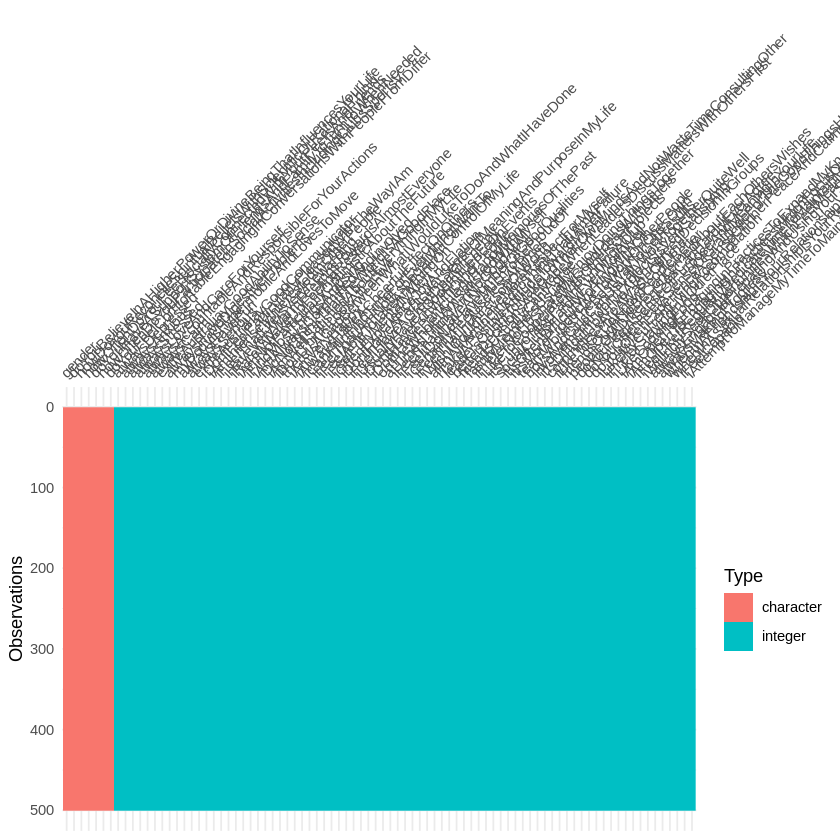

In [ ]:
vis_dat(train)

Observe the data for discrete values

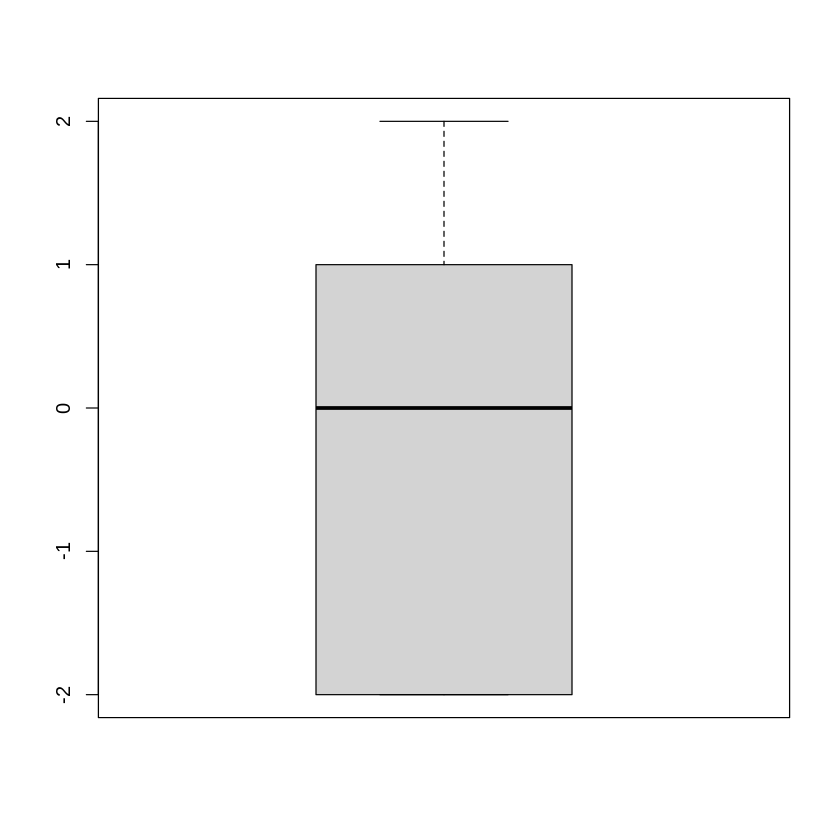

In [ ]:
boxplot(train$iAmVeryHappy)

Plot histograms to observe data trends

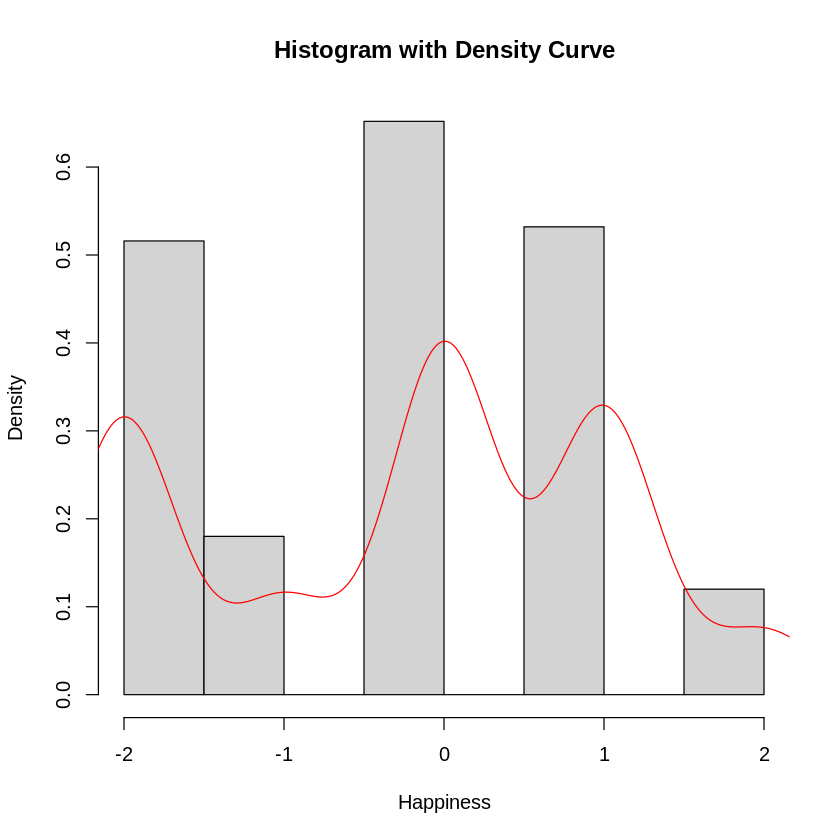

In [ ]:
# Load necessary libraries
library(ggplot2)

# Identify the outliers
outliers <- boxplot(train$iAmVeryHappy, plot=FALSE)$out

# Exclude the outliers
happiness_no_outliers <- train$iAmVeryHappy[!train$iAmVeryHappy %in% outliers]

# Calculate the mean of the 'happiness' variable without outliers
mean_no_outliers <- mean(happiness_no_outliers)

# Replace the outliers in the original dataset with the mean_no_outliers
train$iAmVeryHappy[train$iAmVeryHappy %in% outliers] <- mean_no_outliers

# Create the histogram and save the result
hist_info <- hist(train$iAmVeryHappy, freq = FALSE, main = "Histogram with Density Curve", xlab = "Happiness")

# Generate data for the density curve
density_info <- density(train$iAmVeryHappy)

# Add the density curve
lines(density_info, col = "red")


Install the required libraries

In [ ]:
install.packages("nnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load required libraries
library(caret)
library(nnet)

# Load training data
train <- read.csv('classification_train.csv')

# Set seed for reproducibility
set.seed(123)

# Prepare data
features <- names(train)[!names(train) %in% "iAmVeryHappy"]

# Convert labels to factor type for multi-class classification
labels <- as.factor(train$iAmVeryHappy)

# Define training control
trctrl <- trainControl(method = "cv", number = 5, savePredictions = TRUE)

# Define parameter grid
param_grid <- expand.grid(decay = c(0.6))

# Train the multinomial logistic regression model
fin.mod <- train(x = train[, features], y = labels, method = "multinom", trControl = trctrl, tuneGrid = param_grid)

# Load the test data
test <- read.csv('classification_test.csv')

# Make predictions on the test data
pred.label <- predict(fin.mod, newdata = test[, features])

write.csv(
    data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),
    "ClassificationPredictLabel.csv",
    row.names = F
)

Loading required package: lattice



# weights:  485 (384 variable)
initial  value 642.165727 
iter  10 value 420.157067
iter  20 value 357.269990
iter  30 value 319.746260
iter  40 value 302.973505
iter  50 value 289.627712
iter  60 value 279.072688
iter  70 value 275.575874
iter  80 value 274.632580
iter  90 value 274.136145
iter 100 value 273.981264
final  value 273.981264 
stopped after 100 iterations
# weights:  485 (384 variable)
initial  value 645.384603 
iter  10 value 403.775130
iter  20 value 359.319887
iter  30 value 328.798578
iter  40 value 312.888351
iter  50 value 298.818785
iter  60 value 291.513025
iter  70 value 288.723410
iter  80 value 288.116701
iter  90 value 287.950530
iter 100 value 287.901154
final  value 287.901154 
stopped after 100 iterations
# weights:  485 (384 variable)
initial  value 645.384603 
iter  10 value 425.705210
iter  20 value 361.506851
iter  30 value 322.091396
iter  40 value 305.068977
iter  50 value 289.954895
iter  60 value 278.279958
iter  70 value 274.824943
iter  80 value 2

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

truths <- tryCatch(
    {
        read.csv("../classification_test_label.csv")
    },
    error = function(e){
        read.csv("classification_test_label.csv")
    }
)

f1_score <- F1_Score(truths$x, pred.label)
cat(paste("f1_score is", f1_score))

References:<br>
[1]Gareth, J., Daniela, W., Trevor, H., & Robert, T. (2013). An introduction to statistical learning: with applications in R. Spinger.<br>
[2]Kuhn, M., & Johnson, K. (2013). Applied predictive modeling (Vol. 26, p. 13). New York: Springer.<br>
[3]Faraway, J. J. (2014). Linear models with R. CRC press.<br>

